In [133]:
import pandas as pd
import os
import numpy as np

### Data preprocessing

In [23]:
col_names = ['user_id','age','gender','occupation','zipcode']
users = pd.read_csv('data_movies/users.csv',sep = '\t', index_col=0)


In [24]:
users.head(5)

,user_id,gender,age,occupation,zipcode,age_desc,occ_desc
0,1,F,1,10,48067,Under 18,K-12 student
1,2,M,56,16,70072,56+,self-employed
2,3,M,25,15,55117,25-34,scientist
3,4,M,45,7,02460,45-49,executive/managerial
4,5,M,25,20,55455,25-34,writer


In [16]:
print(len(users))

6040


In [38]:
print(users.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6040 entries, 0 to 6039
Data columns (total 7 columns):
user_id       6040 non-null int64
gender        6040 non-null object
age           6040 non-null int64
occupation    6040 non-null int64
zipcode       6040 non-null object
age_desc      6040 non-null object
occ_desc      6040 non-null object
dtypes: int64(3), object(4)
memory usage: 377.5+ KB
None


#### users dataset have 7 columns with 6040 entries

#### ratings data

In [25]:
# reading rating data
ratings = pd.read_csv('data_movies/ratings.csv',sep = '\t', index_col=0)

/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [26]:
print(len(ratings))

1000209


In [28]:
ratings.head(5)

,user_id,movie_id,rating,timestamp,user_emb_id,movie_emb_id
0,1,1193,5,978300760,0,1192
1,1,661,3,978302109,0,660
2,1,914,3,978301968,0,913
3,1,3408,4,978300275,0,3407
4,1,2355,5,978824291,0,2354


In [36]:
# Check the file info
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
user_id         1000209 non-null int64
movie_id        1000209 non-null int64
rating          1000209 non-null int64
timestamp       1000209 non-null int64
user_emb_id     1000209 non-null int64
movie_emb_id    1000209 non-null int64
dtypes: int64(6)
memory usage: 53.4 MB
None


#### above confirms that there are 1 million records in the database

#### movies data

In [34]:
movies = pd.read_csv('data_movies/movies.csv',sep = '\t',encoding='latin-1', index_col=0)

In [35]:
movies.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [37]:
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id    3883 non-null int64
title       3883 non-null object
genres      3883 non-null object
dtypes: int64(1), object(2)
memory usage: 121.3+ KB
None


#### above confirms that there are three columns in the movies dataset with 3883 entries

#### Data Exploration

In [60]:
import wordcloud
from wordcloud import STOPWORDS,WordCloud
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

In [52]:
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])


In [69]:
pattern = r'[^a-zA-Z\s]'    
title_corpus1 = re.sub(pattern, '', title_corpus)

In [74]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus1)

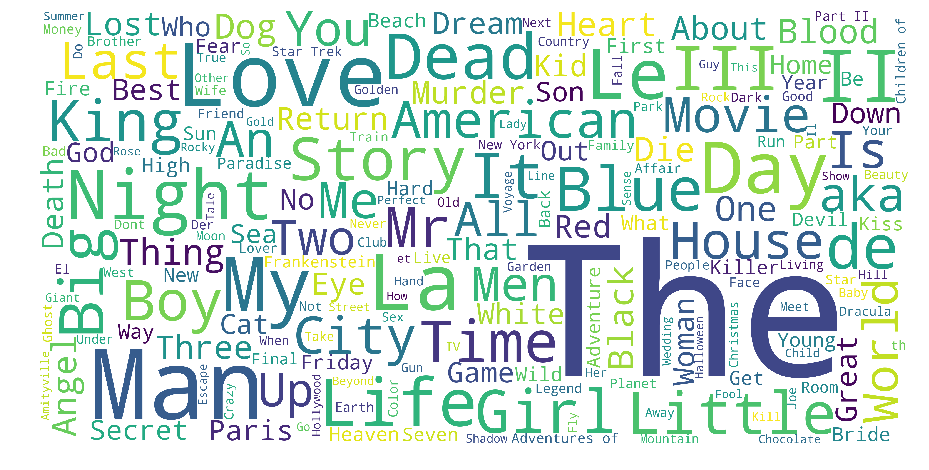

In [75]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

#### next step is to look at ratings columns and see their distribution

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


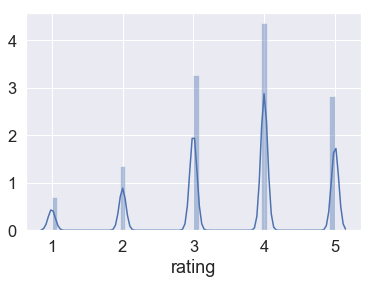

In [76]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))

#### from the average distribution of ratings column we can see that users seems to very generous in giving ratings to the movies as rating score of 4 and 5 is the highest.

In [82]:
#### we have genre column therefore let us identify column with the highest ratings
all_data = pd.merge(pd.merge(movies,ratings),users)


In [83]:
all_data[['title','genres','rating']].sort_values('rating',ascending = False).head(10)

,title,genres,rating
0,Toy Story (1995),Animation|Children's|Comedy,5
489283,American Beauty (1999),Comedy|Drama,5
489259,Election (1999),Comedy,5
489257,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5
489256,Dead Ringers (1988),Drama|Thriller,5
489237,Rushmore (1998),Comedy,5
489236,"Simple Plan, A (1998)",Crime|Thriller,5
489226,Hands on a Hard Body (1996),Documentary,5
489224,Pleasantville (1998),Comedy,5
489212,Say Anything... (1989),Comedy|Drama|Romance,5


In [96]:
genre_type = set()
for genre in movies['genres'].str.split('|').values:
    genre_type = genre_type.union(set(genre))

In [97]:
print(genre_type)

{'Western', 'Fantasy', 'Film-Noir', "Children's", 'Drama', 'Adventure', 'Comedy', 'Animation', 'Crime', 'Thriller', 'Mystery', 'Musical', 'Action', 'War', 'Romance', 'Sci-Fi', 'Horror', 'Documentary'}


In [98]:
#initialize each genre with zero
movie_genre = dict()
for x in genre_type:
    movie_genre[x] = 0


In [100]:
for genre in movies['genres'].str.split('|').values:
    for s in [s for s in genre if s in genre_type]: 
        movie_genre[s] += 1
        

In [101]:
print(movie_genre)

{'Western': 68, 'Fantasy': 68, 'Film-Noir': 44, "Children's": 251, 'Drama': 1603, 'Adventure': 283, 'Comedy': 1200, 'Animation': 105, 'Crime': 211, 'Thriller': 492, 'Mystery': 106, 'Musical': 114, 'Action': 503, 'War': 143, 'Romance': 471, 'Sci-Fi': 276, 'Horror': 343, 'Documentary': 127}


In [104]:
#sorting dictionary in descending order to find movies from largest to smalles genre
movie_genre1 = sorted(movie_genre.items(), key=lambda x: x[1], reverse=True)

In [107]:
print(movie_genre1)

[('Drama', 1603), ('Comedy', 1200), ('Action', 503), ('Thriller', 492), ('Romance', 471), ('Horror', 343), ('Adventure', 283), ('Sci-Fi', 276), ("Children's", 251), ('Crime', 211), ('War', 143), ('Documentary', 127), ('Musical', 114), ('Mystery', 106), ('Animation', 105), ('Western', 68), ('Fantasy', 68), ('Film-Noir', 44)]


## Building recommendation system

### content based recommendation system

#### the idea of content based recommendation system is based on the concept that if user likes suppose action movies then recommendation system will recommend movies based on genre liked by the user, say if user never liked comedy genre movies then movies from this genre will never be recommended. This is solely based on the content of the user.

#### since we are feeding data into the model, and it will not understand the text, therefore we will perform conver the text in to numerical format by embedding them. Here, i am using tf-idf to do so. TF can be defined as the frequency of a word in a document and idf is the inverse frequency of term that is out of total documents how many contains the term. This is used to negate the affect of frequently occuring terms in the document.

#### further, cosine similarity will be used to determine the movies that are similar to the movies already liked by the user


In [109]:
movies['genres'] = movies['genres'].str.split('|')
# Convert genres to string value
movies['genres'] = movies['genres'].fillna("").astype('str')

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genres'])


In [112]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [113]:
cosine_sim[:4, :4]

array([[1.        , 0.14193614, 0.09010857, 0.1056164 ],
       [0.14193614, 1.        , 0.        , 0.        ],
       [0.09010857, 0.        , 1.        , 0.1719888 ],
       [0.1056164 , 0.        , 0.1719888 , 1.        ]])

In [116]:
# Build a 1-dimensional array with movie titles
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [117]:
genre_recommendations('Good Will Hunting (1997)').head(10)

25                                       Othello (1995)
26                                  Now and Then (1995)
29    Shanghai Triad (Yao a yao yao dao waipo qiao) ...
30                               Dangerous Minds (1995)
35                              Dead Man Walking (1995)
39                      Cry, the Beloved Country (1995)
42                                   Restoration (1995)
52                                      Lamerica (1994)
54                                       Georgia (1995)
56                         Home for the Holidays (1995)
Name: title, dtype: object

#### pros of using content-based recommendation:

    no cold-start or sparsity problems as no requirement os other users data is there
    recommendation tailored to suit user's unique taste
    unpopular or new items can be recommended as it is genre specific
    content-feature can be listed to state the reason why an item is recommended
    
#### cons of using content-based recommendation:
    user will never be recommended items outside of currently ranked items
    other user's recommendations are not taken into consideration


### collaborative filtering

there are two main types of collaborative filtering 

    1. user-user collaborative filtering : here users with similar tastes are found and then movies are recommended 
    on the basis of likes and dislikes of user clusters. That is if user1 likes movies 1,2 and 3 and user2 likes 2,3 and 4 then recommendation system will recommend movie 1 to user2 and 4 to user1. Though this recommedation system is very effective but it takes time large amount of time and resources as it computes each user pair information.
    
    2. Item-Item Collaborative Filtering: in this method, we try to build a matrix with similar movies, thus if user rates a movie then new movie will be recommended to the user on the basis of the movies similar to the newly rated movie.
    
    
    
    
    There are 3 distance similarity metrics that are usually used in collaborative filtering:

    Jaccard Similarity:
        Similarity is based on the number of users which have rated item A and B divided by the number of users who have rated either A or B.It is typically used where we don’t have a numeric rating but just a boolean value like a product being bought or an add being clicked

    Cosine Similarity: (as in the Content-Based system)
        Similarity is the cosine of the angle between the 2 vectors of the item vectors of A and B. Closer the vectors, smaller will be the angle and larger the cosine

    Pearson Similarity:
        Similarity is the pearson coefficient between the two vectors.


In [119]:
# Fill NaN values in user_id and movie_id column with 0
ratings['user_id'] = ratings['user_id'].fillna(0)
ratings['movie_id'] = ratings['movie_id'].fillna(0)

# Replace NaN values in rating column with average of all values
ratings['rating'] = ratings['rating'].fillna(ratings['rating'].mean())

#### Due to the limited computing power of laptop, I will build the recommender system using only a subset of the ratings.

In [122]:
# Randomly sample 1% of the ratings dataset
ratings1 = ratings.sample(frac=0.02)
# Check the sample info
print(ratings1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20004 entries, 736018 to 470318
Data columns (total 6 columns):
user_id         20004 non-null int64
movie_id        20004 non-null int64
rating          20004 non-null int64
timestamp       20004 non-null int64
user_emb_id     20004 non-null int64
movie_emb_id    20004 non-null int64
dtypes: int64(6)
memory usage: 1.1 MB
None


In [157]:
users = ratings1.user_id.unique().shape[0]
print('no of unique users:',users)

no of unique users: 4710


In [159]:
movies = ratings1.movie_id.unique().shape[0]
print('no of unique movies which are rated',movies)http://localhost:8888/notebooks/movie_lens-recommendation_system.ipynb#

no of unique movies which are rated 2676


#### here scikit-learn library is being used to  split the dataset into testing and training. Cross_validation.train_test_split shuffles and splits the data into two datasets.

In [160]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(ratings1, test_size=0.2)

In [195]:
train_data_matrix = train_data.as_matrix(columns = ['user_id', 'movie_id', 'rating'])
test_data_matrix = test_data.as_matrix(columns = ['user_id', 'movie_id', 'rating'])

# Check their shape
print(train_data_matrix.shape)
print(test_data_matrix.shape)

(16003, 3)
(4001, 3)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [216]:
from sklearn.metrics.pairwise import pairwise_distances


user_similarity =  1 - pairwise_distances(train_data, metric='correlation')

user_similarity[np.isnan(user_similarity)] = 0





In [217]:
print(user_similarity[:4, :4])

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [218]:
item_similarity =  1 - pairwise_distances(train_data_matrix.T, metric='correlation')
item_similarity[np.isnan(item_correlation)] = 0

In [219]:
# Item Similarity Matrix
print(item_similarity)

[[ 1.         -0.01531538  0.01275565]
 [-0.01531538  1.         -0.06476899]
 [ 0.01275565 -0.06476899  1.        ]]


In [220]:


# Function to predict ratings
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        # Use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
#         print(similarity.shape)
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred



In [221]:
user_prediction = predict(train_data_matrix, user_similarity, type='user')


In [222]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')

### Evaluation


    There are many evaluation metrics but one of the most popular metric used to evaluate accuracy of predicted ratings is Root Mean Squared Error (RMSE). here, the mean_square_error (MSE) function from sklearn, where the RMSE is just the square root of MSE.

In [223]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [224]:

# RMSE on the test data
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 1367.2421637174243
Item-based CF RMSE: 1660.1407078314226


In [225]:
# RMSE on the train data
print('User-based CF RMSE: ' + str(rmse(user_prediction, train_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, train_data_matrix)))

User-based CF RMSE: 973.7913722226859
Item-based CF RMSE: 146.74222632277647
